# Статистика, прикладной поток
## Практическое задание 5

В данном задании вы исследуете некоторые свойства доверительных интервалов и байесовских оценок.

**Правила:**

* Дедлайн **25 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 5"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  5 баллов **O2**
* Задача 2 -  5 баллов **O2**
* Задача 3 -  5 баллов **O2**
* Задача 4 -  5 баллов **O2**
* Задача 5 -  7 баллов **O2**
* Задача 6 -  7 баллов **O2**
* Задача 7 -  7 баллов **O2**
* Задача 8 -  10 баллов **O3**
* Задача 9 -  6 баллов **O2**

In [605]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

## Доверительные интервалы

__________________
### Задача 1.
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Чтобы не плодить код, напишите следующую функцию (см. ниже). Пример построения есть в ноутбуке по `matplotlib`.

In [606]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None),  # ограничение по оси y
        interval_color='g',  # Цвет доверительного интервала
        label_before='Точный',  # Уточнение, какой доверительный интервал
        label_after='$\\theta$'  # Подпись к доверительному интервала
    ):
    
    n = left.shape[0]
    grid = np.arange(1, n + 1)
    
    plt.ylim(ylim)
    
    plt.fill_between(grid, left, right, alpha=0.2, color=interval_color, 
                     label=label_before + ' Доверительный интервал для ' + label_after)
    
    if not (sample is None):
        plt.scatter(grid, sample, alpha=0.2, s=30, color=interval_color)
    
    if not (estimation is None):
        plt.plot(grid, estimation, color=interval_color, linewidth=2,
                 label='Оценка ' + label_after)

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


In [607]:
# Константы Для всей задачи
alpha = 0.95
n = 100
numbers = np.arange(1, n + 1)

**Решение:**

* Точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$:
$$(\overline{X}-z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}}, \overline{X}+z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}})$$
Где $z_{\frac{1+\alpha}{2}}$ - $\frac{1+\alpha}{2}$ - квантиль стандартного нормального распределения

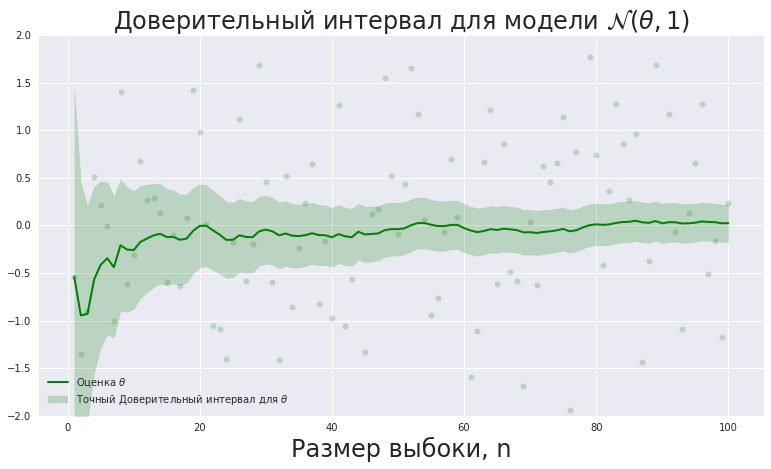

In [608]:
X = sps.norm().rvs(n) # Выборка из стандартного нормального распределения

X_mean = X.cumsum() / numbers # префикс средние суммы
indent = sps.norm().ppf((1 + alpha) / 2) / (numbers ** 0.5) # длина отступа от среднего

left = X_mean - indent
right = X_mean + indent

plt.figure(figsize=(13, 7))
plt.title('Доверительный интервал для модели $\\mathcal{N}(\\theta, 1)$', fontsize=24)
plt.xlabel('Размер выбоки, n', fontsize=24)

draw_confidence_interval(left, right, X_mean, X, ylim=(-2, 2))

plt.legend()
plt.show()

* Точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$:
$$(X_{(n)}, (1-\alpha)^{\frac{-1}{n}}X_{(n)})$$

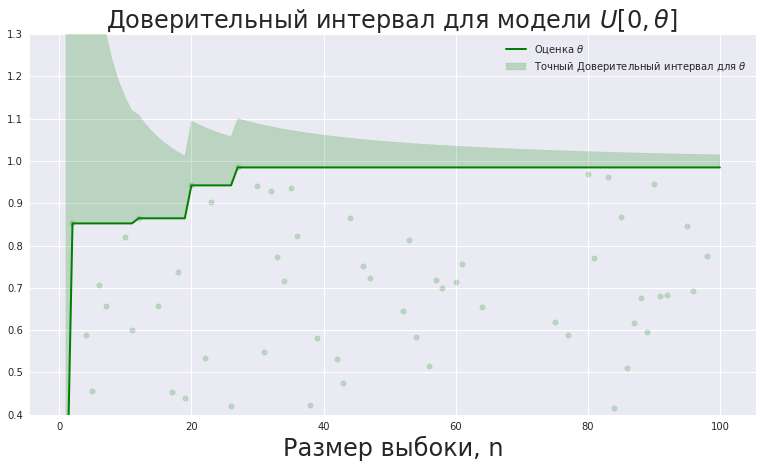

In [609]:
X = sps.uniform(loc=0, scale=1).rvs(n) # Выборка из равномерного распределения

X_max = np.maximum.accumulate(X) # префикс максимум выборки
c = (1-alpha) ** (-1/numbers)

left = X_max
right = X_max * c

plt.figure(figsize=(13, 7))
plt.title(r'Доверительный интервал для модели $U[0, \theta]$ ', fontsize=24)
plt.xlabel('Размер выбоки, n', fontsize=24)

draw_confidence_interval(left, right, X_max, X, ylim=(0.4, 1.3))

plt.legend()
plt.show()

**Вывод:**

Можно заметить, что практически при любом размере выборки истинное значение $\theta$ покрывается доверительным интервалом. Что не противоречит $0.95$ уровню доверия этих доверительных интервалов

__________________
### Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

In [610]:
# Константы Для всей задачи
alpha = 0.95
n = 100
a = 3
b = 2
numbers = np.arange(1, n + 1)
Z = sps.norm().ppf((1 + alpha) / 2)

**Решение:**
    
* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, \beta)$, где $\beta$ известно:
$$
(\frac{\beta}{\overline{X}} - \sqrt{\frac{\beta}{n}} \cdot \frac{z_{\frac{1+\alpha}{2}}}{\overline{X}},
 \frac{\beta}{\overline{X}} + \sqrt{\frac{\beta}{n}} \cdot \frac{z_{\frac{1+\alpha}{2}}}{\overline{X}})
$$

* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

$$
\left(
\frac{\overline{X}}{S^2} - \frac{z_{\frac{1+\alpha}{2}} \sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)}{\sqrt{n}},
\frac{\overline{X}}{S^2} + \frac{z_{\frac{1+\alpha}{2}} \sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)}{\sqrt{n}}
\right)
$$
Где $\frac{\overline{X}}{S^2}$ - а.н.о $\theta$ с асимптотической дисперсией $\sigma^2(\theta, \beta)$. А $\sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)$ - состоятельная оценка $\sigma(\theta, \beta)$. (Выкладки опущу, было в седьмом домашнем задании)


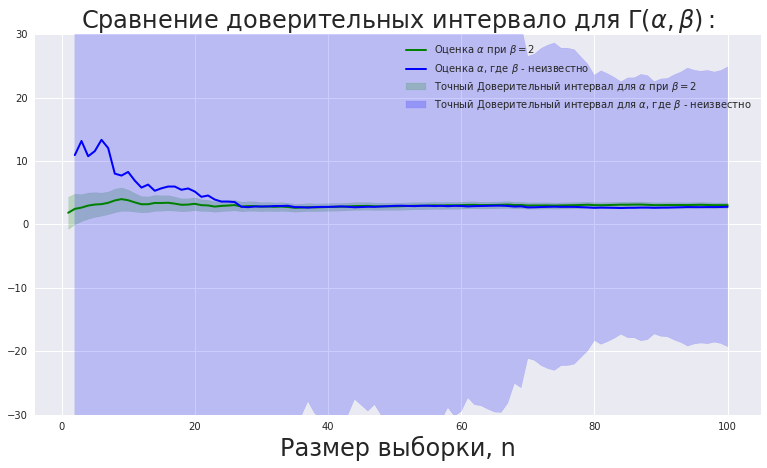

In [611]:
# Генерируем выборку из Г(a, b)
X = sps.gamma(a=b, scale=1/a).rvs(n)

# считаем первый доверительный интервал
X_mean = X.cumsum() / numbers
indent = (2 / numbers) ** 0.5 * Z / X_mean

left_known = 2 / X_mean - indent
right_known = 2 / X_mean + indent

# считаем второй доверительный интервал
S2 = (X ** 2).cumsum() / numbers - X_mean ** 2

a_cons = X_mean / S2
b_cons = X_mean ** 2 / S2
sigma2 = (-(2 * b_cons + 1) * (a_cons ** 2)) / b_cons + 4 * (a_cons ** 3) / b_cons * (1 + b_cons)
indent = Z * sigma2 / numbers ** 0.5

left_unknown = a_cons - indent
right_unknown = a_cons + indent


plt.figure(figsize=(13, 7))
plt.title(r'Сравнение доверительных интервало для $\Gamma(\alpha, \beta):$', fontsize=24)
plt.xlabel('Размер выборки, n', fontsize=24)


draw_confidence_interval(left_known, right_known, estimation=2 / X_mean, 
                         label_after="$\\alpha$ при $\\beta = 2$")

draw_confidence_interval(left_unknown, right_unknown, estimation=X_mean / S2, ylim=(-30, 30), 
                         interval_color="b", 
                         label_after="$\\alpha$, где $\\beta$ - неизвестно")

plt.legend()
plt.show()

Сравните полученные интервалы.

**Вывод:** В том случае, когда мы не знаем второй параметр, и нам приходится использовать состоятельные оценки, интервалы получаются значительно больше.

__________________
### Задача 3.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

In [612]:
# Константы Для всей задачи
alpha = 0.95
n = 100
a = 3
b = 2
numbers = np.arange(1, n + 1)
Z = sps.norm().ppf((1 + alpha) / 2)

# Функции поиска ОМП из предыдущего практического задания
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

def MLE_on_grid(X, C):
    """Ищет минимум логорфмической фунции 
    правдоподобия на заданной сетке """
    
    c_points = C.reshape((1, -1))
    sample = X.reshape((X.shape[0], -1))
    
    # Зададим само распределение Коши:
    distribution = sps.cauchy(loc=c_points)
    # Посчитаем логарифмическую функцию правдоподобия на выборки sample
    pdf = distribution.logpdf(sample)
    likelihood = pdf.sum(axis=0)
    index = cool_argmax(likelihood)
    opt = C[index]
    return opt

def get_grid(l, r, prec):
    """Производит разлиновку отрезка [l, r]
    с шириной одного подотрезка <= prec"""
    
    # Количество подотрезков с длиной <= prec
    seg_cnt = 1 + int((r - l) / prec)
    return np.linspace(l, r, seg_cnt + 1)

def get_MLE(X):
    """Поиск ОМП для заданной выборки X"""
    precision = 1e-5
    c_opt = -10
    clims = [-20, 20]
    curr_step = 1.
    
    while curr_step > precision:
        # Организуем сетку с шириной клетки curr_step
        C = get_grid(clims[0], clims[1], curr_step)
        
        # Находим оптимальное значение
        c_opt = MLE_on_grid(X, C)
        
        # переходим к более маленькой окрестности
        clims = [c_opt - curr_step, c_opt + curr_step]
        
        # уменшая при этом размер клетки
        curr_step /= 5
    
    
    return c_opt


**Решение:**

* Точным доверительным интервалом в модели $\mathcal{N}(\theta, 1)$ будет:
$$
(\overline{X}-z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}}, \overline{X}+z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}})
$$

* Точным асимптотическим доверительным интервалом в параметрической модели распределения Коши со сдвигом, используя выборочную медиану будет:

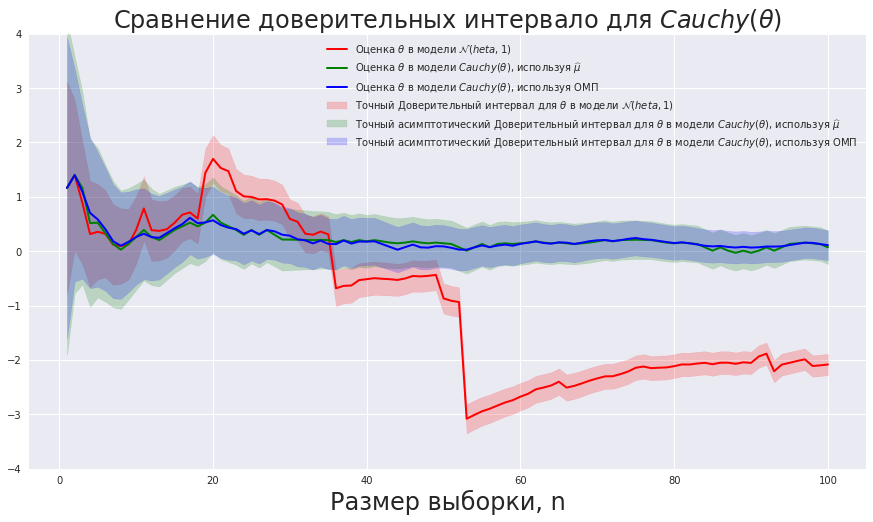

In [613]:
# Генерируем выборку из Cauchy(0)
X = sps.cauchy().rvs(n)

# Параметры для построения
right_bounds = []
left_bounds = []
estimations = [] # оценки
labeles_before = ['Точный', 
                  'Точный асимптотический', 
                  'Точный асимптотический']
labeles_after = ['$\\theta$ в модели $\mathcal{N}(\theta, 1)$',
               '$\\theta$ в модели $Cauchy(\\theta)$, используя $\\widehat{\\mu}$',
               '$\\theta$ в модели $Cauchy(\\theta)$, используя ОМП']
colors = ['r',
          'g',
          'b']

# Считаем первый доверительный интервал
X_mean = X.cumsum() / numbers # префикс средние суммы
indent = sps.norm().ppf((1 + alpha) / 2) / (numbers ** 0.5) # длина отступа от среднего

left_bounds.append(X_mean - indent)
right_bounds.append(X_mean + indent)
estimations.append(X_mean)

# Считаем второй доверительный интервал
X_median = np.array([np.median(X[:i]) for i in numbers]) # Префиксные медианы
indent = Z * np.pi / (2 * numbers ** 0.5) # длина отступа от медианы

left_bounds.append(X_median - indent)
right_bounds.append(X_median + indent)
estimations.append(X_median)

# Считаем третий доверительный интервал
X_mle = np.array([get_MLE(X[:i]) for i in numbers])
indent = Z * (2 / numbers) ** 0.5

left_bounds.append(X_mle - indent)
right_bounds.append(X_mle + indent)
estimations.append(X_mle)

# Теперь перейдём к построению графиков
plt.figure(figsize=(15, 8))
plt.title('Сравнение доверительных интервало для $Cauchy(\\theta)$', fontsize=24)
plt.xlabel('Размер выборки, n', fontsize=24)

for i in range(3):
    draw_confidence_interval(left_bounds[i], right_bounds[i], estimation=estimations[i], 
                            label_before=labeles_before[i], label_after=labeles_after[i], 
                             ylim=(-4, 4), interval_color=colors[i])


plt.legend()
plt.show()

Сравните полученные интервалы.

**Вывод:** 

* Можно заметить, что попытка построить доверительный интервал на параметр сдвига распределения Коши через построение доверительного интервала для нормального распределения не увенчалась успехом. Это можно объяснить хотя бы тем, что распределение Коши не имеет матожидания
* Так же можно заметить, что асимптотический доверителььный интервал изначально толще, чем точный, а затем становится тоньше. Это можно объяснить тем, что он строился для асимптотически эффективной оценки.

__________________
### Задача 4.
Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения.

In [614]:
# Константы Для всей задачи
alpha = 0.95
N = [5, 20, 50]
colors = ["r",
          "g",
          "b"]
Z = sps.norm().ppf((1 + alpha ** 0.5) / 2)

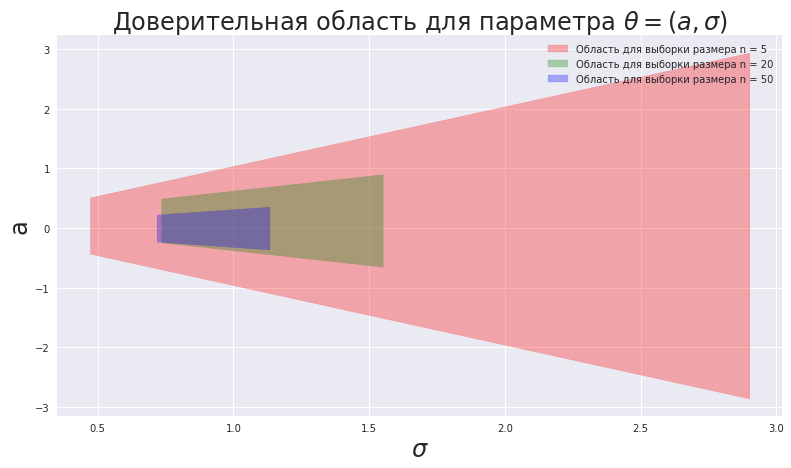

In [615]:
plt.figure(figsize=(13, 7))
plt.title("Доверительная область для параметра $\\theta = (a, \\sigma)$", fontsize=24)
plt.xlabel("$\\sigma$", fontsize=24)
plt.ylabel("a", fontsize=24)

for i in range(3):    
    n = N[i]
    
    # Генерируем выборку размера n
    X = sps.norm().rvs(n)
    X_mean = X.sum() / n
    S2 = (X ** 2).sum() / n - X_mean ** 2
    
    sigma_left = ((n * S2) / sps.chi2(n - 1).ppf((1 + alpha ** 0.5) / 2)) ** 0.5
    sigma_right = ((n * S2) / sps.chi2(n - 1).ppf((1 - alpha ** 0.5) / 2)) ** 0.5
    sigma = np.linspace(sigma_left,  sigma_right, 1000)

    indent = sigma * Z / (n ** 0.5)
    a_left = X_mean - indent
    a_right = X_mean + indent
    
    
    plt.fill_between(sigma, a_left, a_right, alpha=0.3, color=colors[i],
                     label="Область для выборки размера n = {}".format((n)))
    

plt.legend()
plt.show()

**Вывод:** Можно заметить, что при любом размере выборки истинное значение параметра $\theta=(0, 1)$ попадает в области

__________________
### Задача 5.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить асимтотический доверительный интервал (через центральную предельную теорему и лемму Слуцкого) и точный неасимптотический (через распределения хи-квадрат и Стьюдента).

Вывод этих интервалов был разобран на семинарах. Выпишите только ответы.

Асимптотический доверительный интервал: 
$
(T_1^n; T_2^n) = ( \overline{X} - \frac{S}{\sqrt n}z_{\frac{1+\alpha}{2}}; \overline{X} + \frac{S}{\sqrt n}z_{\frac{1+\alpha}{2}})
$


Точный доверительный интервал: 
$
(T_1; T_2) = (\overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1+\alpha}{2}}; \overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1-\alpha}{2}})
$

Реализуйте функции построения этих интервалов по выборке.

In [616]:
def calculate_asymptotic_confidence_interval(sample, alpha=0.95):
    # Узнаём размер выборки
    n = sample.shape[0]
    # Считаем выборочное среднее
    sample_mean = sample.sum() / n
    
    # Считаем выборочную дисперсию
    S2 = (sample ** 2).sum()/n - sample_mean**2
    
    # Считаем радиус доверительного интервала
    indent = S2**0.5 * sps.norm().ppf((1 + alpha) / 2) / n**0.5
    
    left = sample_mean - indent
    right = sample_mean + indent
    
    return (left, right)

def calculate_confidence_interval(sample, alpha=0.95):
    # Узнаём размер выборки
    n = sample.shape[0]
    # Считаем выборочное среднее
    sample_mean = sample.sum() / n
    
    # Считаем выборочную дисперсию
    S2 = (sample ** 2).sum()/n - sample_mean**2
    
    # Считаем радиус доверительного интервала
    indent = (S2 ** 0.5) / (n - 1)**0.5 * sps.t(n - 1).ppf((1 + alpha) / 2)
    
    left = sample_mean - indent
    right = sample_mean + indent
    
    return (left, right)

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

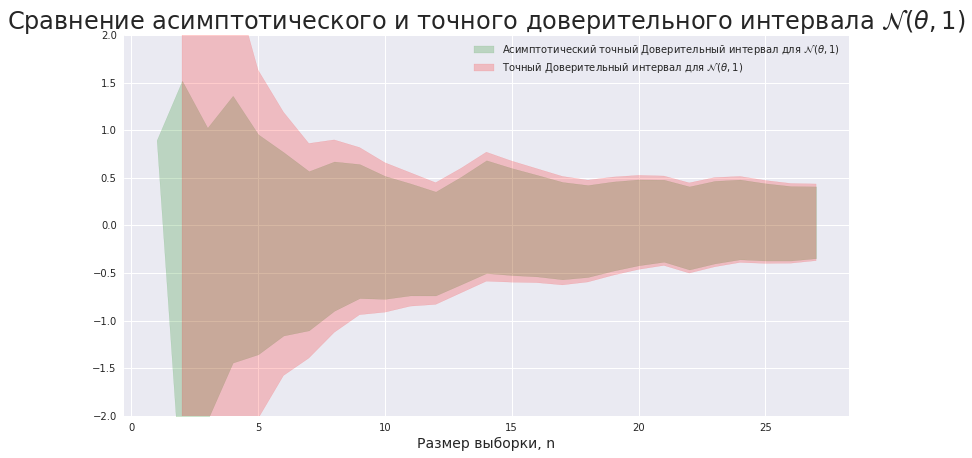

In [617]:
def compare_confidence_intervals(sample, ylim, 
                                 distrib_name='',
                                 draw_sample=False,
                                 draw_estimation=False):
    T1_left = []
    T1_right = []
    T2_left = []
    T2_right = []
    n = len(sample)
    numbers = np.arange(1, n + 1)
    for i in numbers:
        left, right = calculate_asymptotic_confidence_interval(sample[:i])
        T1_left.append(left)
        T1_right.append(right)

        left, right = calculate_confidence_interval(sample[:i])
        T2_left.append(left)
        T2_right.append(right)

    T1_left = np.array(T1_left)
    T1_right = np.array(T1_right)
    T2_left = np.array(T2_left)
    T2_right = np.array(T2_right)
    
    plt.figure(figsize=(13, 7))
    plt.title('Сравнение асимптотического и точного доверительного интервала ' + distrib_name,
             fontsize=24)
    plt.xlabel("Размер выборки, n", fontsize=14)
    
    d_sample = sample if draw_sample else None
    d_estimation = sample.cumsum() / numbers if draw_estimation else None
    draw_confidence_interval(T1_left, T1_right, sample=d_sample,
                             estimation=d_estimation,
                             label_before='Асимптотический точный',
                             label_after=distrib_name)
    draw_confidence_interval(T2_left, T2_right, interval_color="r", ylim=ylim, 
                             label_before='Точный',
                             label_after=distrib_name)
    
    plt.legend()
    plt.show()


# Генерируем выборку
X = sps.norm().rvs(27)
compare_confidence_intervals(X, (-2, 2), distrib_name='$\\mathcal{N}(\\theta, 1)$')

**Вывод:** Можно заметить, что асимптотический доверительный интервал по величине отрезка больше чем точный. Это можно объяснить тем, что уровень доверия его стремиться к $\alpha$ и поэтому отрезки тоже стремятся к отрезкам точного.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина первого типа (за тип вина отвечает первый столбец). 

In [618]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [ 'Alcohol',
                 'Malic acid',
                 'Ash',
                 'Alcalinity of ash',
                 'Magnesium',
                 'Total phenols',
                 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensity',
                 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']

# Считываем все данные
data = pd.read_csv(url, header=None, names=column_names)

# Выбераем только необходимые нам свойства 
need_columns = ["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]
X = data[need_columns]

# переводим тип вина в отдельный столбец
X.index.name='Type'
X.reset_index(inplace=True)
X = X[X.Type == 1]

#  и удаляем его
X.drop(labels='Type', axis=1, inplace=True)

X = np.array(X).T

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

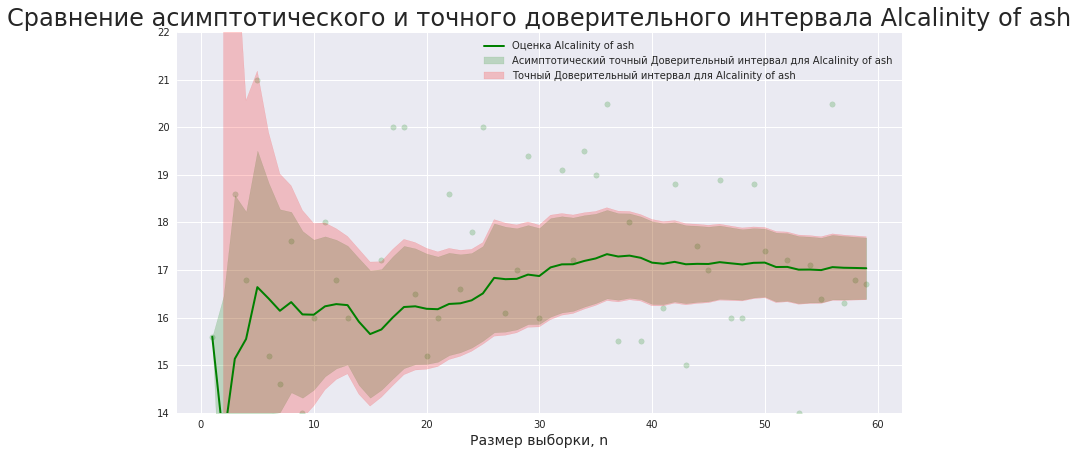

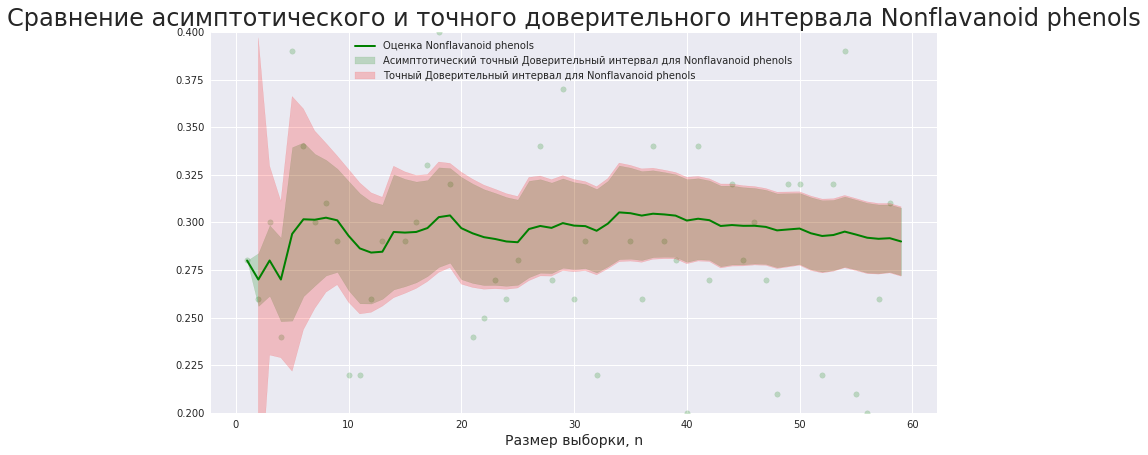

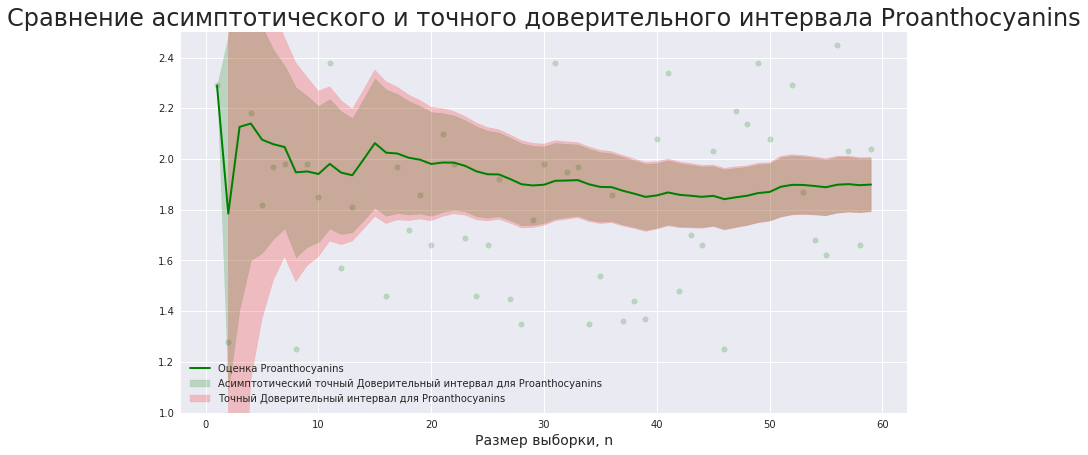

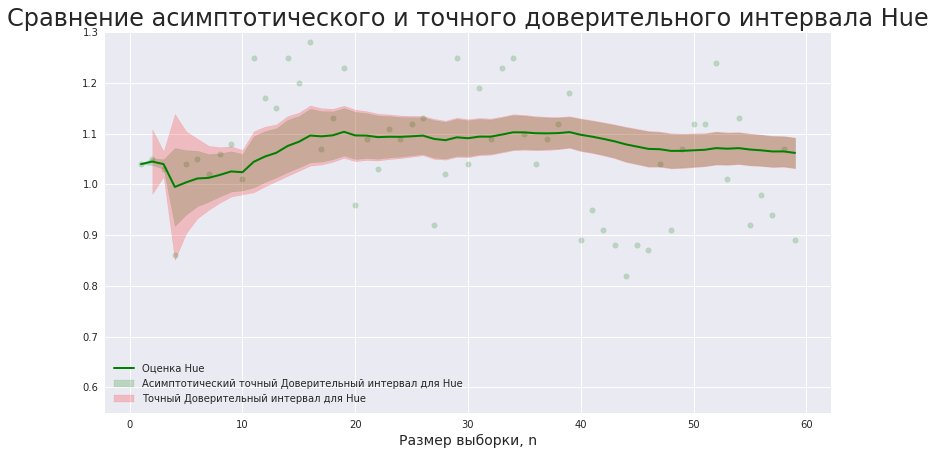

In [619]:
ylims = [(14, 22), 
         (0.2, 0.4),
         (1, 2.5), 
         (0.55, 1.3)]

for i in range(4):
    compare_confidence_intervals(X[i], ylims[i], 
                                 distrib_name=need_columns[i],
                                 draw_sample=True,
                                 draw_estimation=True)

Наконец, постройте точную доверительную область для параметров сдвига и масштаба для каждого из рассматриваемых столбцов. Для экономии места стройте графики в два столбца.

**Вывод:** <...>

________________

## Байесовский подход


__________________
### Задача 6.
 Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, \sigma^2)$, а параметр $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ --- плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ --- плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ -- некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ -- сгенерированная выборка из распределения, имеющего плотность $p(x)$.


Рассмотрим столбец `Alcalinity of ash` датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. 

Для выборки, образованной эти столбцом посчитайте $c$ -- знаменатель в формуле Байеса. Параметры априорного распределения выберите некоторым разумном способом, не опираясь на данные. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?


**Решение:** Не уверен, что можно подобрать параметр $\lambda$ распределения $Cauchy(\lambda)$ разумным образом без оценки данных. Но пусть будет $\lambda = 22$

*Размер сгенерированной выборки - $k$ * лучше выбирать квадратом желаемой точности. С семинара известно, что сходимость метода Монте-Карло - $\mathcal{O}(\frac{1}{\sqrt{k}})$. Допустим, мы хотим точность $10^{-2}$. Для этого выберем $k = 10^4$

In [506]:
sample = data['Alcalinity of ash']
# Размер выборки
n = len(sample)
# Параметр априорного распределения
lda = 25
# Размер выборки
k = 400000
# Так как сигма считается известной в данной модели (А точнее полностю незамечена) то положим \sigma = S^2
S2 = (sample ** 2).mean() - (sample.mean()) ** 2
S = S2 ** 0.5

thetas = sps.cauchy(loc=lda).rvs(k)
sample = sample.reshape((n, 1))
c = sps.norm(loc=thetas, scale=np.zeros(k) + S).logpdf(sample).sum(axis=0)
c = np.exp(c)
c = c.sum() / k
print ('Величина знаменателя:\nc\t = {}'.format(c))

Величина знаменателя:
c	 = 1.2965259504206139e-205


Для апостериорного распределения:
- Нарисуйте график плотности;
- Посчитайте математическое ожидание;
- Найдите симметричный 95%-ый доверительный интервал.

Получим формулу для вычисления математического ожидания $\mathsf{E}q(t|X)$:


$$
\mathsf{E}q\left.(t\,\right|\,x) 
= \mathsf{E}\left(\frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt}\right)
= \frac{1}{c} \int\limits_\Theta t \cdot q(t) p_t(x_1) ... p_t(x_n) dt
\approx \frac{1}{c\cdot k} \sum\limits_{j=1}^k \xi_i f(\xi_i)
$$


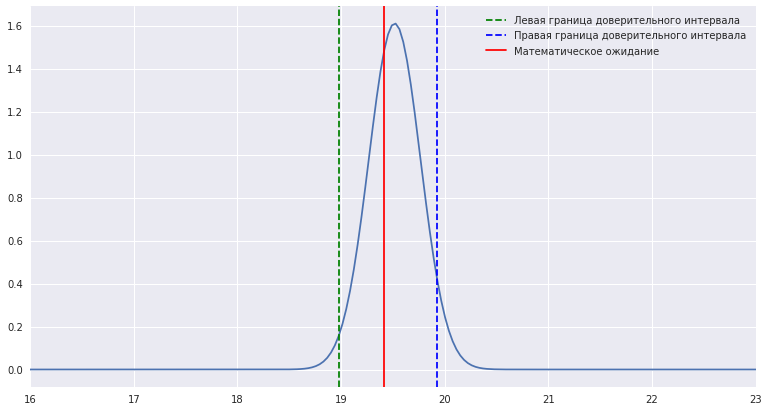

In [507]:
sz = 3000
alpha = 0.95

grid_l, grid_r = (-10, 100)
grid = np.linspace(grid_l, grid_r, sz)
grid_step = (grid_r - grid_l) / (sz - 1)

# Считаем апосториорное распределения в точках разбиения сетки
# До этого считал не через логорифм плотности и получалось неправдоподобная плотность
apost = sps.cauchy(loc=lda).logpdf(grid)
apost += sps.norm(loc=grid, scale=np.zeros(sz) + S).logpdf(sample).sum(axis=0)
apost -= np.log(c)
apost = np.exp(apost)

# Считаем префиксный "интеграл"
pref_int = (apost * grid_step).cumsum()
# Находим индекс (1 - \alpha)/2 квантили 
ind_left = np.searchsorted(pref_int, (1 - alpha) / 2, side='left') - 1
# Находим индекс (1 + \alpha)/2 квантили 
ind_right = np.searchsorted(pref_int, (1 + alpha) / 2, side='left') - 1
# А теперь и сами квантили
left, right = grid[ind_left], grid[ind_right]

# Посчитаем мат. ожидание
thetas = sps.cauchy(loc=lda).rvs(size=k)
mean_value = sps.norm(loc=thetas, scale=np.zeros(k) + S).pdf(sample).prod(axis=0)
mean_value /= c
mean_value *= thetas
mean_value = mean_value.sum() / k

plt.figure(figsize=(13, 7))
plt.xlim (16, 23)

plt.plot(grid, apost)
plt.axvline(left, ls='--', color='g', label="Левая граница доверительного интервала")
plt.axvline(right, ls='--', color='b', label="Правая граница доверительного интервала")
plt.axvline(mean_value, ls='-', color='r', label="Математическое ожидание")
plt.legend()
plt.show()

**Вывод:** 
* Матожидание почти делит плотность пополам.

* Если априорное распределение было симметрично $\lambda = 25$, то апостериорное сместилось к реальным значениям и имеет $\lambda \approx 19.5$, что примерно соответствует среднему выборки. Тем самым выборка улучшила оценкуна распределение.


__________________
### Задача 7.
 Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как его значения параметров соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1);
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6);
* ничего не известно (все значения равновероятны).

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

** Решение: ** Из второй задачи, восьмого домашнего задания известно, что семейство $\left\{\mathsf{B(\alpha, \beta)}\right\}$ сопряжено к $\left\{\mathsf{Bern(p)}\right\}$

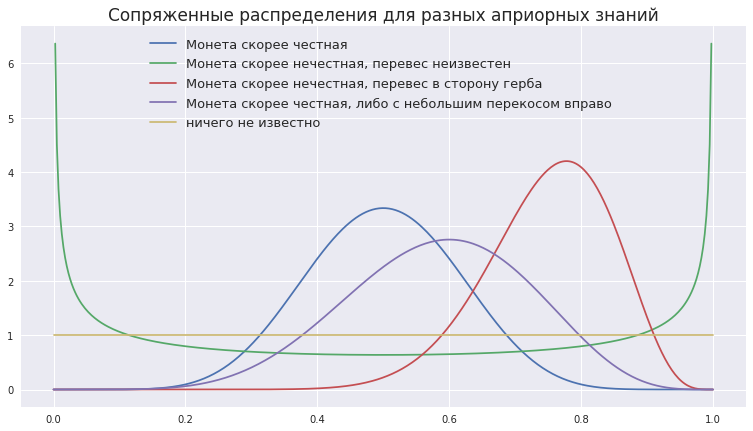

In [594]:
grid = np.linspace(0, 1, 400)
aprior_params = [[9, 9],
                [.5, .5],
                [15, 5],
                [7, 5],
                [1, 1]]
aprior_names = ['Монета скорее честная ',
                'Монета скорее нечестная, перевес неизвестен',
                'Монета скорее нечестная, перевес в сторону герба',
                'Монета скорее честная, либо с небольшим перекосом вправо ',
                'ничего не известно']

plt.figure(figsize=(13, 7))
plt.title('Сопряженные распределения для разных априорных знаний', fontsize=17)

for i in range(len(aprior_params)):
    a, b = aprior_params[i]
    plt.plot(grid, sps.beta(a=a, b=b).pdf(grid), 
         label=aprior_names[i])

plt.legend(fontsize=13);
plt.show()

**Вывод:** $\left\{(x(t), y(t)\right\}$

Ниже приведена реализация некоторых вспомогательных функций.

In [533]:
def draw_posteriori(grid, distr_class, post_params, xlim=None, title=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    plt.title(title)
    plt.xlim(xlim)
    plt.grid(ls=':')
    
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    
    
    plt.legend()
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [587]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    n = len(sample)
    
    params = np.ones(2 * n).reshape(n, 2)
    params = (params * np.array([a, b])).T
    sums = sample.cumsum()
    numbers = np.arange(1, n + 1)
    params[0] += sums
    params[1] += numbers - sums
    param0 = np.array([[a], [b]])
    return np.hstack((param0, params)).T

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

* Проводим броски симметричной монеты

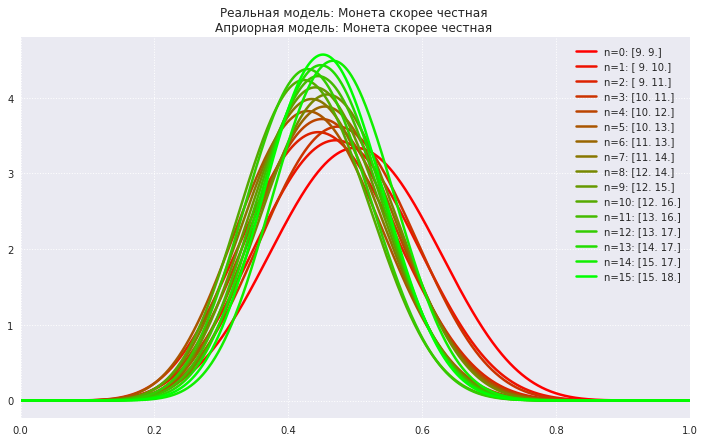

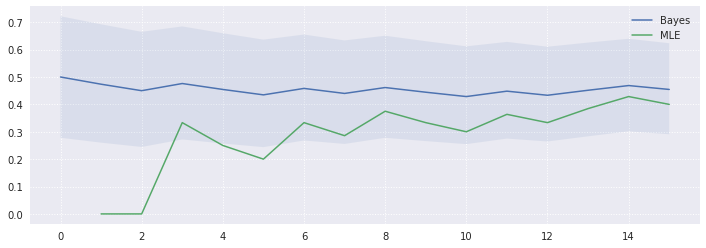

In [595]:
n = 15
grid = np.linspace(0, 1, 1000)

X = sps.bernoulli(0.5).rvs(size=15)
X_mean = X.cumsum() / np.arange(1, n + 1)

# Априорные параметры для честной монеты
a, b = aprior_params[0]
params = bern_posterior_params(X, a, b)
title = "Реальная модель: " + aprior_names[0] + "\n" + \
        "Априорная модель: " + aprior_names[0]
    
draw_posteriori(grid, sps.beta, params, 
                        title=title)
draw_estimations(X_mean, sps.beta, params)

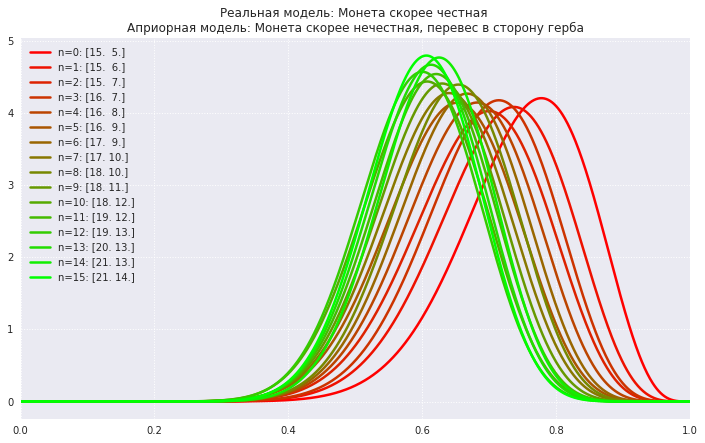

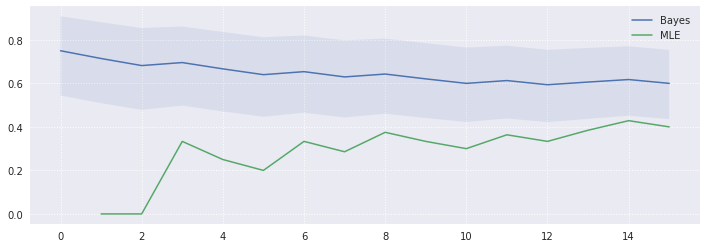

In [596]:
# Априорные параметры для нечестной монеты
a, b = aprior_params[2]
params = bern_posterior_params(X, a, b)
title = "Реальная модель: " + aprior_names[0] + "\n" + \
        "Априорная модель: " + aprior_names[2]
    
draw_posteriori(grid, sps.beta, params, 
                        title=title)
draw_estimations(X_mean, sps.beta, params)

* Проводим броски несимметричной монеты

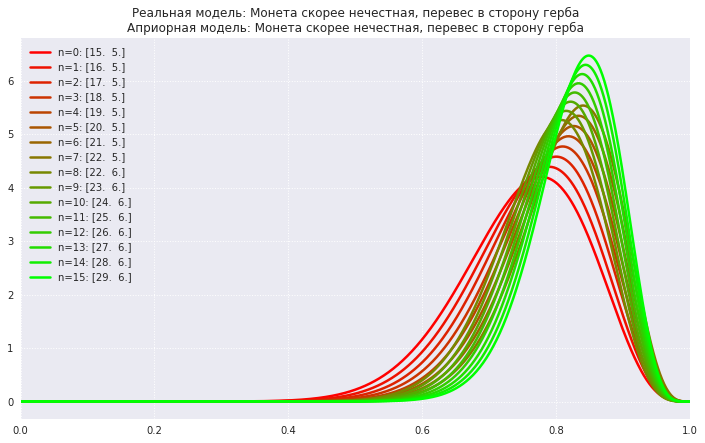

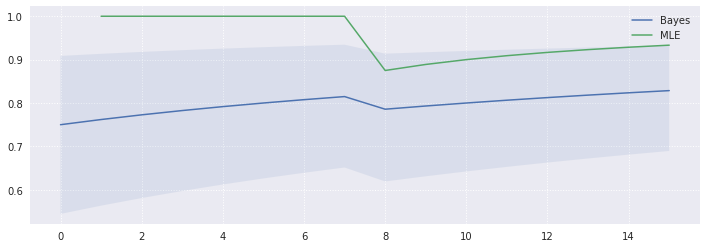

In [599]:
X = sps.bernoulli(0.9).rvs(size=15)
X_mean = X.cumsum() / np.arange(1, n + 1)

# Априорные параметры для Несимметричной монеты
a, b = aprior_params[2]
params = bern_posterior_params(X, a, b)
title = "Реальная модель: " + aprior_names[2] + "\n" + \
        "Априорная модель: " + aprior_names[2]
    
draw_posteriori(grid, sps.beta, params, 
                        title=title)
draw_estimations(X_mean, sps.beta, params)

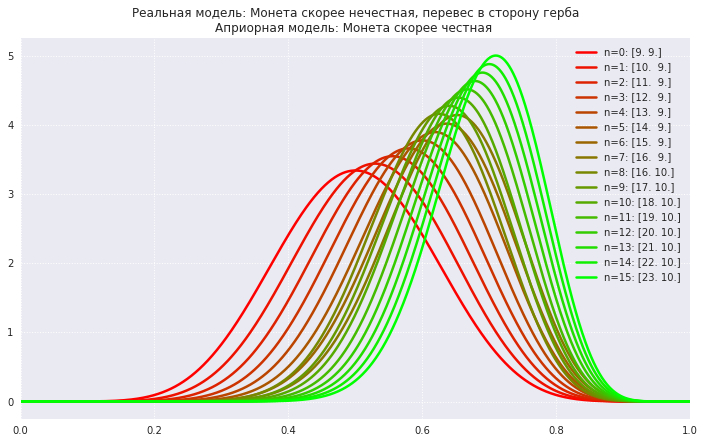

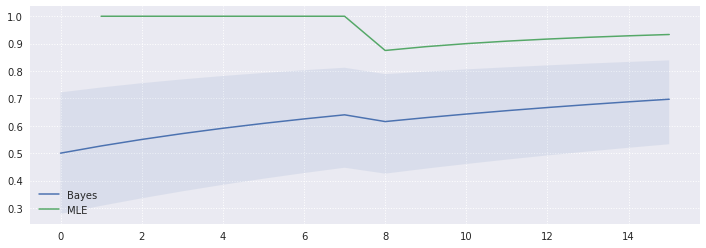

In [600]:
# Априорные параметры для честной монеты
a, b = aprior_params[0]
params = bern_posterior_params(X, a, b)
title = "Реальная модель: " + aprior_names[2] + "\n" + \
        "Априорная модель: " + aprior_names[0]
    
draw_posteriori(grid, sps.beta, params, 
                        title=title)
draw_estimations(X_mean, sps.beta, params)

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

**Вывод:** 

* Если было взято неверное предположение: априорное распределение с неверными параметрами - то с ростом размера выборки апостериорное распределение приближается к истинному

* Если были выбраны правильные параметры, то апостериорное распределение сужается к истинному значению параметра, тем самым увеличивает вероятность именно истинного значения

* Оценка зависит от априорного распределения: при верно подобранном ОМП попадает в доверительный интервал

__________________
### Задача 8.
 
Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

In [ ]:
<...>

**Вывод:** <...>

__________________
### Задача 9.
 Проведите исследование, аналогичное задаче 7 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

In [ ]:
<...>

**Вывод:** <...>